<center><h1>v0.19.1 (November 3, 2016)</h1></center>
## 新特性：提升性能和修复bug

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#pd.__version__

#更新Python包
# conda update pandas

u'0.19.1'

## 常见问题
* DataFrame内存使用问题
* 字节排序问题
* 使用qt可视化数据

In [9]:
dtypes = ['int64', 'float64', 'datetime64[ns]', 'timedelta64[ns]','complex128', 'object', 'bool']
n = 5000
data = dict([(t, np.random.randint(100,size=n).astype(t)) for t in dtypes])
df = pd.DataFrame(data)
df['categotical'] = df['object'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
bool               5000 non-null bool
complex128         5000 non-null complex128
datetime64[ns]     5000 non-null datetime64[ns]
float64            5000 non-null float64
int64              5000 non-null int64
object             5000 non-null object
timedelta64[ns]    5000 non-null timedelta64[ns]
categotical        5000 non-null category
dtypes: bool(1), category(1), complex128(1), datetime64[ns](1), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 284.1+ KB


In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
bool               5000 non-null bool
complex128         5000 non-null complex128
datetime64[ns]     5000 non-null datetime64[ns]
float64            5000 non-null float64
int64              5000 non-null int64
object             5000 non-null object
timedelta64[ns]    5000 non-null timedelta64[ns]
categotical        5000 non-null category
dtypes: bool(1), category(1), complex128(1), datetime64[ns](1), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 401.2 KB


In [11]:
# 查看各列的内存使用情况
df.memory_usage()

Index                 72
bool                5000
complex128         80000
datetime64[ns]     40000
float64            40000
int64              40000
object             40000
timedelta64[ns]    40000
categotical         5800
dtype: int64

### 数据的可视化qt: pandas_qt/easyGUI

In [12]:
import easygui
easygui.ynbox('Shall I continue?', 'Title', ('Yes', 'No'))

# easygui.msgbox('This is a basic message box.', 'Title Goes Here')

# easygui.buttonbox('Click on your favorite flavor.', 'Favorite Flavor', ('Chocolate', 'Vanilla', 'Strawberry'))

True

## 包概览

pandas支持Series、DataFrame和Panel

Dataframe是Series的容器、Panel是DataFrame的容器

## 十分钟速学pandas

### 创建对象

In [14]:
#创建series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [15]:
#创建DataFrame
dates = pd.date_range('20161218',periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=list('ABCD'))
df

,A,B,C,D
2016-12-18,0.905467,0.726887,0.231299,-1.261442
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677
2016-12-20,0.098073,-1.755892,0.652470,2.736317
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272
2016-12-23,-0.197813,-0.581270,0.464847,1.067717


In [16]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),                      
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 查看数据
* df.head()
* df.tail()
* df.index
* df.columns
* df.values
* df.describe()
* df.T
* df.sort_index()

In [18]:
#查看前几行和后几行
df.head()

,A,B,C,D
2016-12-18,0.905467,0.726887,0.231299,-1.261442
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677
2016-12-20,0.098073,-1.755892,0.652470,2.736317
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272


In [20]:
df.tail(3)

,A,B,C,D
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272
2016-12-23,-0.197813,-0.581270,0.464847,1.067717


In [21]:
# 查看索引、列、值
df.index

DatetimeIndex(['2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [23]:
df.values

array([[ 0.90546727,  0.72688702,  0.2312991 , -1.26144153],
       [-0.27544277, -0.93503105, -0.20159133,  0.70167673],
       [ 0.09807291, -1.75589233,  0.65247036,  2.73631708],
       [ 0.31615464, -1.3513168 , -0.62919322, -0.11659485],
       [-0.36068951,  0.54161989, -1.75140105, -0.96727249],
       [-0.19781307, -0.58126973,  0.46484667,  1.06771676]])

In [24]:
#统计描述
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.080958,-0.559167,-0.205595,0.360067
std,0.476490,1.006686,0.888326,1.475287
min,-0.360690,-1.755892,-1.751401,-1.261442
25%,-0.256035,-1.247245,-0.522293,-0.754603
50%,-0.049870,-0.758150,0.014854,0.292541
75%,0.261634,0.260897,0.406460,0.976207
max,0.905467,0.726887,0.652470,2.736317


In [25]:
#转置
df.T

,2016-12-18 00:00:00,2016-12-19 00:00:00,2016-12-20 00:00:00,2016-12-21 00:00:00,2016-12-22 00:00:00,2016-12-23 00:00:00
A,0.905467,-0.275443,0.098073,0.316155,-0.360690,-0.197813
B,0.726887,-0.935031,-1.755892,-1.351317,0.541620,-0.581270
C,0.231299,-0.201591,0.652470,-0.629193,-1.751401,0.464847
D,-1.261442,0.701677,2.736317,-0.116595,-0.967272,1.067717


In [26]:
#按列、值排序
df.sort_index(axis=1,ascending=False) #axis=0行 axis=1列

,D,C,B,A
2016-12-18,-1.261442,0.231299,0.726887,0.905467
2016-12-19,0.701677,-0.201591,-0.935031,-0.275443
2016-12-20,2.736317,0.652470,-1.755892,0.098073
2016-12-21,-0.116595,-0.629193,-1.351317,0.316155
2016-12-22,-0.967272,-1.751401,0.541620,-0.360690
2016-12-23,1.067717,0.464847,-0.581270,-0.197813


In [30]:
#按值排序
df.sort_values(by='A')

,A,B,C,D
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677
2016-12-23,-0.197813,-0.581270,0.464847,1.067717
2016-12-20,0.098073,-1.755892,0.652470,2.736317
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595
2016-12-18,0.905467,0.726887,0.231299,-1.261442


### 选择

In [31]:
df['A']

2016-12-18    0.905467
2016-12-19   -0.275443
2016-12-20    0.098073
2016-12-21    0.316155
2016-12-22   -0.360690
2016-12-23   -0.197813
Freq: D, Name: A, dtype: float64

In [32]:
df[0:3] #前三行

,A,B,C,D
2016-12-18,0.905467,0.726887,0.231299,-1.261442
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677
2016-12-20,0.098073,-1.755892,0.652470,2.736317


In [33]:
df['20161218':'20161220'] #按index索引

,A,B,C,D
2016-12-18,0.905467,0.726887,0.231299,-1.261442
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677
2016-12-20,0.098073,-1.755892,0.652470,2.736317


In [35]:
dates[0]
# 按label选
df.loc[dates[0]]

A    0.905467
B    0.726887
C    0.231299
D   -1.261442
Name: 2016-12-18 00:00:00, dtype: float64

In [36]:
df.loc[:, ['A', 'B']]

,A,B
2016-12-18,0.905467,0.726887
2016-12-19,-0.275443,-0.935031
2016-12-20,0.098073,-1.755892
2016-12-21,0.316155,-1.351317
2016-12-22,-0.360690,0.541620
2016-12-23,-0.197813,-0.581270


In [37]:
df.loc['20161218':'20161220',['A','B']]

,A,B
2016-12-18,0.905467,0.726887
2016-12-19,-0.275443,-0.935031
2016-12-20,0.098073,-1.755892


In [38]:
df.at[dates[0],'A']

0.90546726623274798

### 布尔索引

In [39]:
df[df.A > 0]

,A,B,C,D
2016-12-18,0.905467,0.726887,0.231299,-1.261442
2016-12-20,0.098073,-1.755892,0.652470,2.736317
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595


In [40]:
df[df > 0]

,A,B,C,D
2016-12-18,0.905467,0.726887,0.231299,NaN
2016-12-19,NaN,NaN,NaN,0.701677
2016-12-20,0.098073,NaN,0.652470,2.736317
2016-12-21,0.316155,NaN,NaN,NaN
2016-12-22,NaN,0.541620,NaN,NaN
2016-12-23,NaN,NaN,0.464847,1.067717


In [41]:
# 使用isin()过滤
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2016-12-18,0.905467,0.726887,0.231299,-1.261442,one
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677,one
2016-12-20,0.098073,-1.755892,0.652470,2.736317,two
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595,three
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272,four
2016-12-23,-0.197813,-0.581270,0.464847,1.067717,three


## 使用isin()过滤

In [43]:
%%time
df2[df2['E'].isin(['two','four'])]

Wall time: 1e+03 µs


,A,B,C,D,E
2016-12-20,0.098073,-1.755892,0.652470,2.736317,two
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272,four


In [52]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20161218',periods=6))
s1

2016-12-18    1
2016-12-19    2
2016-12-20    3
2016-12-21    4
2016-12-22    5
2016-12-23    6
Freq: D, dtype: int64

In [53]:
df['F'] = s1
df

,A,B,C,D,F
2016-12-18,0.000000,0.000000,0.231299,-1.261442,1
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677,2
2016-12-20,0.098073,-1.755892,0.652470,2.736317,3
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595,4
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272,5
2016-12-23,-0.197813,-0.581270,0.464847,1.067717,6


In [54]:
# 根据标签修改值
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2016-12-18,0.000000,0.000000,0.231299,-1.261442,1
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677,2
2016-12-20,0.098073,-1.755892,0.652470,2.736317,3
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595,4
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272,5
2016-12-23,-0.197813,-0.581270,0.464847,1.067717,6


In [55]:
# 根据位置修改值
df.iat[0,1] = 0
df

,A,B,C,D,F
2016-12-18,0.000000,0.000000,0.231299,-1.261442,1
2016-12-19,-0.275443,-0.935031,-0.201591,0.701677,2
2016-12-20,0.098073,-1.755892,0.652470,2.736317,3
2016-12-21,0.316155,-1.351317,-0.629193,-0.116595,4
2016-12-22,-0.360690,0.541620,-1.751401,-0.967272,5
2016-12-23,-0.197813,-0.581270,0.464847,1.067717,6


In [57]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2016-12-18,0.000000,0.000000,0.231299,5,1
2016-12-19,-0.275443,-0.935031,-0.201591,5,2
2016-12-20,0.098073,-1.755892,0.652470,5,3
2016-12-21,0.316155,-1.351317,-0.629193,5,4
2016-12-22,-0.360690,0.541620,-1.751401,5,5
2016-12-23,-0.197813,-0.581270,0.464847,5,6


In [58]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2016-12-18,0.000000,0.000000,-0.231299,-5,-1
2016-12-19,-0.275443,-0.935031,-0.201591,-5,-2
2016-12-20,-0.098073,-1.755892,-0.652470,-5,-3
2016-12-21,-0.316155,-1.351317,-0.629193,-5,-4
2016-12-22,-0.360690,-0.541620,-1.751401,-5,-5
2016-12-23,-0.197813,-0.581270,-0.464847,-5,-6


### 缺失值

In [59]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2016-12-18,0.000000,0.000000,0.231299,5,1,1.0
2016-12-19,-0.275443,-0.935031,-0.201591,5,2,1.0
2016-12-20,0.098073,-1.755892,0.652470,5,3,NaN
2016-12-21,0.316155,-1.351317,-0.629193,5,4,NaN


In [60]:
df1.dropna(how='any')

,A,B,C,D,F,E
2016-12-18,0.000000,0.000000,0.231299,5,1,1.0
2016-12-19,-0.275443,-0.935031,-0.201591,5,2,1.0


In [61]:
df1

,A,B,C,D,F,E
2016-12-18,0.000000,0.000000,0.231299,5,1,1.0
2016-12-19,-0.275443,-0.935031,-0.201591,5,2,1.0
2016-12-20,0.098073,-1.755892,0.652470,5,3,NaN
2016-12-21,0.316155,-1.351317,-0.629193,5,4,NaN


In [63]:
#缺失值填充
df1.fillna(value=5)

,A,B,C,D,F,E
2016-12-18,0.000000,0.000000,0.231299,5,1,1.0
2016-12-19,-0.275443,-0.935031,-0.201591,5,2,1.0
2016-12-20,0.098073,-1.755892,0.652470,5,3,5.0
2016-12-21,0.316155,-1.351317,-0.629193,5,4,5.0


In [64]:
# 判断是否为缺失值
pd.isnull(df1)

,A,B,C,D,F,E
2016-12-18,False,False,False,False,False,False
2016-12-19,False,False,False,False,False,False
2016-12-20,False,False,False,False,False,True
2016-12-21,False,False,False,False,False,True


## 操作

In [66]:
# 统计
df.mean()#按列求均值

A   -0.069953
B   -0.680315
C   -0.205595
D    5.000000
F    3.500000
dtype: float64

In [67]:
df.mean(1)#按横轴求均值

2016-12-18    1.246260
2016-12-19    1.117587
2016-12-20    1.398930
2016-12-21    1.467129
2016-12-22    1.685906
2016-12-23    2.137153
Freq: D, dtype: float64

In [68]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)#shift轮播
s

2016-12-18    NaN
2016-12-19    NaN
2016-12-20    1.0
2016-12-21    3.0
2016-12-22    5.0
2016-12-23    NaN
Freq: D, dtype: float64

In [69]:
df.sub(s, axis='index')

,A,B,C,D,F
2016-12-18,NaN,NaN,NaN,NaN,NaN
2016-12-19,NaN,NaN,NaN,NaN,NaN
2016-12-20,-0.901927,-2.755892,-0.347530,4.0,2.0
2016-12-21,-2.683845,-4.351317,-3.629193,2.0,1.0
2016-12-22,-5.360690,-4.458380,-6.751401,0.0,0.0
2016-12-23,NaN,NaN,NaN,NaN,NaN


### Apply

In [70]:
df.apply(np.cumsum)

,A,B,C,D,F
2016-12-18,0.000000,0.000000,0.231299,5,1
2016-12-19,-0.275443,-0.935031,0.029708,10,3
2016-12-20,-0.177370,-2.690923,0.682178,15,6
2016-12-21,0.138785,-4.042240,0.052985,20,10
2016-12-22,-0.221905,-3.500620,-1.698416,25,15
2016-12-23,-0.419718,-4.081890,-1.233569,30,21


In [72]:
df.apply(lambda x: x.max()-x.min())

A    0.676844
B    2.297512
C    2.403871
D    0.000000
F    5.000000
dtype: float64

### 直方图

In [73]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    1
1    3
2    1
3    2
4    2
5    1
6    6
7    3
8    4
9    4
dtype: int32

In [74]:
s.value_counts()

1    3
4    2
3    2
2    2
6    1
dtype: int64

### 字符串方法 
**str**

In [75]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()# s.str.方法

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [2]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.707278,-0.856756,-0.026124,0.505653
1,-1.768930,-0.554548,0.651203,-1.007852
2,0.163402,0.836142,1.925557,0.422808
3,-1.683259,0.030141,0.324619,-0.098572
4,1.187661,0.286115,-1.249961,1.694918
5,1.549432,-0.993636,0.961485,-1.434416
6,0.273322,-1.456518,-3.300396,0.221903
7,1.062570,1.501791,-0.200095,0.680773
8,0.001142,0.565576,0.733566,-1.488464
9,-1.021429,-0.868679,0.018439,-1.850134


In [77]:
df[:3]#前三行

,0,1,2,3
0,-0.124476,1.932231,-0.655084,-0.994914
1,-1.244800,-0.136422,0.508562,0.253991
2,-1.694227,-0.347796,0.522086,0.310504


In [78]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.124476  1.932231 -0.655084 -0.994914
 1 -1.244800 -0.136422  0.508562  0.253991
 2 -1.694227 -0.347796  0.522086  0.310504,
           0         1         2         3
 3  0.954835 -0.043389  0.361855 -1.066020
 4 -0.020228 -1.153833 -1.433697  0.460062
 5 -1.470585  0.768873  0.095500 -0.084362
 6  0.142769 -1.793267  0.933985  0.821671,
           0         1         2         3
 7  0.944840 -0.647658  0.354811  0.029253
 8  1.445511  0.531496  1.567952 -0.249491
 9  0.279347 -0.207916  0.192195 -0.026013]

In [79]:
pd.concat(pieces)# concat拼接 按行加

,0,1,2,3
0,-0.124476,1.932231,-0.655084,-0.994914
1,-1.244800,-0.136422,0.508562,0.253991
2,-1.694227,-0.347796,0.522086,0.310504
3,0.954835,-0.043389,0.361855,-1.066020
4,-0.020228,-1.153833,-1.433697,0.460062
5,-1.470585,0.768873,0.095500,-0.084362
6,0.142769,-1.793267,0.933985,0.821671
7,0.944840,-0.647658,0.354811,0.029253
8,1.445511,0.531496,1.567952,-0.249491
9,0.279347,-0.207916,0.192195,-0.026013


### join

In [80]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [81]:
left = pd.DataFrame({'key':['foo', 'bar'], 'lval':[1,2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


###  append

In [82]:
df = pd.DataFrame(np.random.randn(8,4), columns=list('ABCD'))
df

,A,B,C,D
0,-1.244313,0.487037,0.813655,1.548241
1,-1.073009,0.389993,-0.804088,0.748901
2,-1.679539,0.435586,0.112779,0.837882
3,-0.297352,0.388375,0.555010,0.459818
4,-0.190298,0.280373,0.477889,1.423645
5,0.746571,-0.776692,-1.231798,-0.313188
6,0.638461,-1.602918,0.469786,-0.267037
7,1.259509,-2.007323,0.186262,-0.531230


In [86]:
s = df.iloc[3]#第四行

t = df.iloc[:,3] #第四列

In [87]:
df.append(s, ignore_index=True) #append 追加

,A,B,C,D
0,-1.244313,0.487037,0.813655,1.548241
1,-1.073009,0.389993,-0.804088,0.748901
2,-1.679539,0.435586,0.112779,0.837882
3,-0.297352,0.388375,0.555010,0.459818
4,-0.190298,0.280373,0.477889,1.423645
5,0.746571,-0.776692,-1.231798,-0.313188
6,0.638461,-1.602918,0.469786,-0.267037
7,1.259509,-2.007323,0.186262,-0.531230
8,-0.297352,0.388375,0.555010,0.459818


### Grouping聚合

In [88]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.259827,0.608252
1,bar,one,0.397497,-0.880844
2,foo,two,1.685502,2.267696
3,bar,three,1.059339,1.298087
4,foo,two,0.811070,0.391070
5,bar,two,-1.322046,1.222570
6,foo,one,1.591796,0.420410
7,foo,three,-0.958073,0.610151


In [89]:
df.groupby('A').sum() #聚合求和

,C,D
A,,
bar,0.134790,1.639813
foo,2.870467,4.297580


### Reshape

In [92]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [93]:
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [94]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.385926  1.133564
      two     0.129725  0.763149
baz   one     0.659805  0.051334
      two     0.548517 -0.289576
foo   one     0.617839 -1.234820
      two    -0.772116 -0.463556
qux   one    -0.253618 -0.119805
      two    -0.393647  0.497282

In [96]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.385926  1.133564
      two     0.129725  0.763149
baz   one     0.659805  0.051334
      two     0.548517 -0.289576

### stack()

In [97]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.385926
               B    1.133564
       two     A    0.129725
               B    0.763149
baz    one     A    0.659805
               B    0.051334
       two     A    0.548517
               B   -0.289576
dtype: float64

In [98]:
stacked.unstack()

A         B
first second                    
bar   one    -1.385926  1.133564
      two     0.129725  0.763149
baz   one     0.659805  0.051334
      two     0.548517 -0.289576

In [99]:
stacked.unstack(1)#默认 last level最后一层

second        one       two
first                      
bar   A -1.385926  0.129725
      B  1.133564  0.763149
baz   A  0.659805  0.548517
      B  0.051334 -0.289576

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.385926  0.659805
       B  1.133564  0.051334
two    A  0.129725  0.548517
       B  0.763149 -0.289576

In [101]:
stacked.unstack(2)

A         B
first second                    
bar   one    -1.385926  1.133564
      two     0.129725  0.763149
baz   one     0.659805  0.051334
      two     0.548517 -0.289576

### Pivot Tables

In [103]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.692101,3.116228
1,one,B,foo,0.522442,0.793411
2,two,C,foo,-0.010115,0.646898
3,three,A,bar,-0.234154,0.840045
4,one,B,bar,1.399747,0.935003
5,one,C,bar,2.274388,-1.720243
6,two,A,foo,-0.676459,-0.218054
7,three,B,foo,-0.285357,0.431224
8,one,C,foo,-0.049628,-0.638344
9,one,A,bar,-0.679162,0.688089


In [104]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.679162 -0.692101
      B  1.399747  0.522442
      C  2.274388 -0.049628
three A -0.234154       NaN
      B       NaN -0.285357
      C -1.383368       NaN
two   A       NaN -0.676459
      B -0.303621       NaN
      C       NaN -0.010115

## 时间序列

In [105]:
rng = pd.date_range('20160101', periods=100, freq='S')#以1s为步长，取100个时间
rng

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:01',
               '2016-01-01 00:00:02', '2016-01-01 00:00:03',
               '2016-01-01 00:00:04', '2016-01-01 00:00:05',
               '2016-01-01 00:00:06', '2016-01-01 00:00:07',
               '2016-01-01 00:00:08', '2016-01-01 00:00:09',
               '2016-01-01 00:00:10', '2016-01-01 00:00:11',
               '2016-01-01 00:00:12', '2016-01-01 00:00:13',
               '2016-01-01 00:00:14', '2016-01-01 00:00:15',
               '2016-01-01 00:00:16', '2016-01-01 00:00:17',
               '2016-01-01 00:00:18', '2016-01-01 00:00:19',
               '2016-01-01 00:00:20', '2016-01-01 00:00:21',
               '2016-01-01 00:00:22', '2016-01-01 00:00:23',
               '2016-01-01 00:00:24', '2016-01-01 00:00:25',
               '2016-01-01 00:00:26', '2016-01-01 00:00:27',
               '2016-01-01 00:00:28', '2016-01-01 00:00:29',
               '2016-01-01 00:00:30', '2016-01-01 00:00:31',
               '2016-01-

In [107]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2016-01-01 00:00:00    494
2016-01-01 00:00:01    101
2016-01-01 00:00:02    416
2016-01-01 00:00:03    450
2016-01-01 00:00:04    318
2016-01-01 00:00:05    362
2016-01-01 00:00:06    256
2016-01-01 00:00:07      0
2016-01-01 00:00:08    157
2016-01-01 00:00:09    245
2016-01-01 00:00:10    231
2016-01-01 00:00:11    353
2016-01-01 00:00:12    128
2016-01-01 00:00:13    233
2016-01-01 00:00:14    245
2016-01-01 00:00:15    326
2016-01-01 00:00:16    351
2016-01-01 00:00:17    445
2016-01-01 00:00:18    324
2016-01-01 00:00:19    404
2016-01-01 00:00:20     92
2016-01-01 00:00:21    205
2016-01-01 00:00:22    229
2016-01-01 00:00:23    134
2016-01-01 00:00:24    485
2016-01-01 00:00:25    119
2016-01-01 00:00:26    379
2016-01-01 00:00:27    151
2016-01-01 00:00:28    160
2016-01-01 00:00:29    379
                      ... 
2016-01-01 00:01:10    424
2016-01-01 00:01:11    223
2016-01-01 00:01:12    170
2016-01-01 00:01:13    119
2016-01-01 00:01:14    283
2016-01-01 00:01:15    252
2

In [112]:
ts.resample?

In [108]:
ts.resample('5Min').sum()

2016-01-01    24342
Freq: 5T, dtype: int32

In [113]:
rng = pd.date_range('20161201 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04',
               '2016-12-05'],
              dtype='datetime64[ns]', freq='D')

In [114]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2016-12-01   -1.445692
2016-12-02   -2.282532
2016-12-03    0.411475
2016-12-04   -0.902594
2016-12-05   -0.609815
Freq: D, dtype: float64

In [115]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2016-12-01 00:00:00+00:00   -1.445692
2016-12-02 00:00:00+00:00   -2.282532
2016-12-03 00:00:00+00:00    0.411475
2016-12-04 00:00:00+00:00   -0.902594
2016-12-05 00:00:00+00:00   -0.609815
Freq: D, dtype: float64

In [116]:
#改变为其他时区
ts_utc.tz_convert('US/Eastern')

2016-11-30 19:00:00-05:00   -1.445692
2016-12-01 19:00:00-05:00   -2.282532
2016-12-02 19:00:00-05:00    0.411475
2016-12-03 19:00:00-05:00   -0.902594
2016-12-04 19:00:00-05:00   -0.609815
Freq: D, dtype: float64

In [117]:
ts.to_period?

In [118]:
png = pd.period_range('1990Q1','2000Q4', freq='Q-NOV')
png

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [119]:
ts = pd.Series(np.random.randn(len(png)), png)
ts.index = (png.asfreq('M', 'e')+1).asfreq('H', 's')+9

In [120]:
ts.head()

1990-03-01 09:00   -0.533135
1990-06-01 09:00   -1.555253
1990-09-01 09:00    0.200784
1990-12-01 09:00   -1.076143
1991-03-01 09:00    0.871497
Freq: H, dtype: float64

## Categoricals类型

In [121]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df['grade'] = df['raw_grade'].astype('category')
df.grade

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [125]:
df['grade'].cat.categories = ["very good", "good", "very bad"]
df['grade'] = df['grade'].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [127]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [128]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 画图

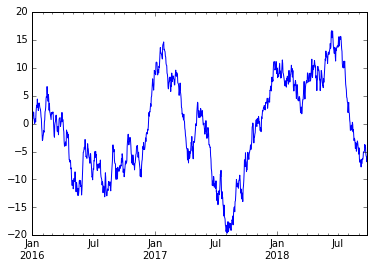

In [131]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20160101', periods=1000))
ts = ts.cumsum()
ts.plot()

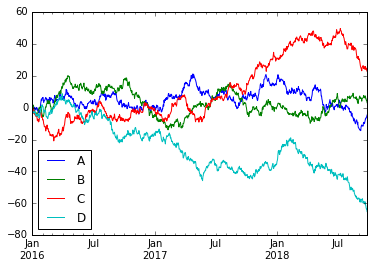

In [134]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()#加不加这句有什么区别
df.plot()
plt.legend(loc='best')

### 访问数据

In [136]:
df.to_hdf('foo.h5','df')

In [138]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2016-01-01,-2.130086,-0.584102,-1.203518,-1.280334
2016-01-02,-1.590523,0.056697,-0.011471,-2.492700
2016-01-03,-0.865147,0.949256,-0.408344,-2.315912
2016-01-04,-0.408083,1.621812,-1.104472,-3.089378
2016-01-05,-1.500007,-0.605695,-2.079414,-2.837063
2016-01-06,-1.577840,-1.489231,-3.737960,-3.526172
2016-01-07,0.012910,-1.838122,-2.271435,-3.213538
2016-01-08,0.299038,-3.846489,-3.014399,-2.717596
2016-01-09,-0.167345,-3.761772,-4.568298,-2.358710
2016-01-10,-0.846320,-3.588410,-4.304090,-2.789308


# 教程

In [139]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 
                   'BBB' : [10,20,30,40],
                   'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [140]:
# if-then
df.ix[df.AAA>=5,'BBB'] = -1
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [142]:
df.ix[df.AAA>=5, ['BBB','CCC']]=555 #可用来处理批量值替换
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [143]:
df_mask = pd.DataFrame({'AAA' : [True] * 4, 'BBB' : [False] * 4,'CCC' : [True,False] * 2})
df.where(df_mask, -100)

,AAA,BBB,CCC
0,4,-100,100
1,5,-100,-100
2,6,-100,555
3,7,-100,-100


In [144]:
df['logic'] = np.where(df['AAA'] >5, 'high', 'low')
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,555,555,low
2,6,555,555,high
3,7,555,555,high


### 分割

In [145]:
dflow = df[df.AAA <= 5]
dflow

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,555,555,low


In [146]:
newseries = df.loc[(df.BBB>25) & (df.CCC > 500), 'AAA']
newseries

1    5
2    6
3    7
Name: AAA, dtype: int64

In [148]:
newseries = df.loc[(df.BBB < 25) | (df.CCC < 500), 'AAA']
newseries

0    4
Name: AAA, dtype: int64

In [149]:
# argsort
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
aValue = 43.0
df.ix[(df.CCC-aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [152]:
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB ==10.0
allCrit = Crit1 & Crit2

In [153]:
Crit1

0     True
1     True
2    False
3    False
Name: AAA, dtype: bool

In [154]:
Crit2

0     True
1    False
2    False
3    False
Name: BBB, dtype: bool

In [155]:
allCrit

0     True
1    False
2    False
3    False
dtype: bool

In [159]:
CritList = [Crit1, Crit2]
AllCrit = reduce(lambda x, y: x&y, CritList)
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


### 选择

In [161]:
df[(df.AAA <= 6) & (df.index.isin([0,2,4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [162]:
df.index = ['foo','bar','boo','kar']

In [163]:
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [164]:
df.loc['bar':'kar']#按索引选择

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [165]:
df.ix[0:3] #按行选择前三行

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [166]:
df.ix['bar':'kar']

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [168]:
df.index = [1,2,3,4]
df

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30
4,7,40,-50


In [169]:
df.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [170]:
df.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [171]:
# ~inverse operator
df[~((df.AAA <= 5)& (df.index.isin([0,2,4])))]

,AAA,BBB,CCC
1,4,10,100
3,6,30,-30
4,7,40,-50


### 面板

In [175]:
rng = pd.date_range('1/1/2013',periods=100,freq='D')
data = np.random.randn(100, 4)
cols = list('ABCD')
df1, df2, df3 = pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng,cols), pd.DataFrame(data, rng,cols)
pf = pd.Panel({'df1':df1,'df2':df2,'df3':df3})
pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 4 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2013-01-01 00:00:00 to 2013-04-10 00:00:00
Minor_axis axis: A to D

In [176]:
pf = pf.transpose(2, 0, 1)
pf['E'] = pd.DataFrame(data, rng, cols)
pf = pf.transpose(1,2,0)# 交换面板的维度
pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 5 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2013-01-01 00:00:00 to 2013-04-10 00:00:00
Minor_axis axis: A to E

In [177]:
pf.transpose?

In [181]:
# applymap 创建新列
df = pd.DataFrame({'AAA' : [1,2,1,3], 'BBB' : [1,1,2,2], 'CCC' : [2,1,3,1]})
source_cols = df.columns
new_cols = [str(x) + '_cat' for x in source_cols]
categories = {1 : 'Alpha', 2 : 'Beta', 3 : 'Charlie'}
df[new_cols] = df[source_cols].applymap(categories.get)
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [186]:
df.groupby('AAA')['BBB'].idxmin()

AAA
1    0
2    1
3    3
Name: BBB, dtype: int64

In [182]:
df.loc[df.groupby('AAA')['BBB'].idxmin()]

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
3,3,2,1,Charlie,Beta,Alpha


In [187]:
df.sort_values(by='BBB').groupby('AAA', as_index=False).first()

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,3,2,1,Charlie,Beta,Alpha


In [191]:
df.div?

In [192]:
# slicing a multi-index with xs
coords = [('AA','one'),('AA','six'),('BB','one'),('BB','two'),('BB','six')]
index = pd.MultiIndex.from_tuples(coords)
df = pd.DataFrame([11,22,33,44,55],index,['MyData'])
df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [193]:
df.xs('BB', level=0, axis=0)

,MyData
one,33
two,44
six,55


In [197]:
# itertools.product
import itertools
index = list(itertools.product(['Ada','Quinn','Violet'],['Comp','Math','Sci']))
index

[('Ada', 'Comp'),
 ('Ada', 'Math'),
 ('Ada', 'Sci'),
 ('Quinn', 'Comp'),
 ('Quinn', 'Math'),
 ('Quinn', 'Sci'),
 ('Violet', 'Comp'),
 ('Violet', 'Math'),
 ('Violet', 'Sci')]

### 缺失值

In [199]:
df = pd.DataFrame(np.random.randn(6,1), index=pd.date_range('20160101', periods=6),columns=['A'])
df.ix[3, 'A'] = np.nan
df

,A
2016-01-01,0.399767
2016-01-02,0.397411
2016-01-03,1.333456
2016-01-04,NaN
2016-01-05,-0.011168
2016-01-06,0.782492


In [200]:
df.reindex(df.index[::-1]).ffill()

,A
2016-01-06,0.782492
2016-01-05,-0.011168
2016-01-04,-0.011168
2016-01-03,1.333456
2016-01-02,0.397411
2016-01-01,0.399767


### 聚合

In [201]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
   ....:                    'size': list('SSMMMLL'),
   ....:                    'weight': [8, 10, 11, 1, 20, 12, 12],
   ....:                    'adult' : [False] * 5 + [True] * 2})
df

,adult,animal,size,weight
0,False,cat,S,8
1,False,dog,S,10
2,False,cat,M,11
3,False,fish,M,1
4,False,dog,M,20
5,True,cat,L,12
6,True,cat,L,12


In [202]:
# get_group
gb = df.groupby(['animal'])
gb.get_group('cat')

,adult,animal,size,weight
0,False,cat,S,8
2,False,cat,M,11
5,True,cat,L,12
6,True,cat,L,12


In [203]:
# expanding apply
S = pd.Series([i / 100.0 for i in rang(1,11)])
def CumRet(x, y):
    return x * (1 + y)
def Red(x):
    return functools.reduce(CumRet, x, 1.0)
S.expanding.apply(Red)

Object `expanding.apply` not found.


In [204]:
df['size'].expanding().apply?

In [207]:
df.weight.cumsum()# 累积和

0     8
1    18
2    29
3    30
4    50
5    62
6    74
Name: weight, dtype: int64

In [209]:
df = pd.DataFrame(data={'Case' : ['A','A','A','B','A','A','B','A','A'],
   .....:                         'Data' : np.random.randn(9)})
df

,Case,Data
0,A,0.667416
1,A,-0.977318
2,A,1.145317
3,B,0.940323
4,A,0.796002
5,A,-2.102049
6,B,1.094204
7,A,-1.362904
8,A,-0.167810


In [210]:
dfs = list(zip(* df.groupby((1 * (df['Case'] == 'B')).cumsum().rolling(
                window=3,min_periods=1).median())))[-1]
dfs

(  Case      Data
 0    A  0.667416
 1    A -0.977318
 2    A  1.145317
 3    B  0.940323,   Case      Data
 4    A  0.796002
 5    A -2.102049
 6    B  1.094204,   Case      Data
 7    A -1.362904
 8    A -0.167810)

In [211]:
dfs[0]

,Case,Data
0,A,0.667416
1,A,-0.977318
2,A,1.145317
3,B,0.940323


In [212]:
1 * (df['Case'] == 'B') #T/F用1/0表示

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
Name: Case, dtype: int32

In [213]:
df.rolling?

In [214]:
data = """;;;;
   .....:  ;;;;
   .....:  ;;;;
   .....:  ;;;;
   .....:  ;;;;
   .....:  ;;;;
   .....: ;;;;
   .....:  ;;;;
   .....:  ;;;;
   .....: ;;;;
   .....: date;Param1;Param2;Param4;Param5
   .....:     ;m²;°C;m²;m
   .....: ;;;;
   .....: 01.01.1990 00:00;1;1;2;3
   .....: 01.01.1990 01:00;5;3;4;5
   .....: 01.01.1990 02:00;9;5;6;7
   .....: 01.01.1990 03:00;13;7;8;9
   .....: 01.01.1990 04:00;17;9;10;11
   .....: 01.01.1990 05:00;21;11;12;13
   .....: """
   .....: 
data

';;;;\n ;;;;\n ;;;;\n ;;;;\n ;;;;\n ;;;;\n;;;;\n ;;;;\n ;;;;\n;;;;\ndate;Param1;Param2;Param4;Param5\n    ;m\xc2\xb2;\xc2\xb0C;m\xc2\xb2;m\n;;;;\n01.01.1990 00:00;1;1;2;3\n01.01.1990 01:00;5;3;4;5\n01.01.1990 02:00;9;5;6;7\n01.01.1990 03:00;13;7;8;9\n01.01.1990 04:00;17;9;10;11\n01.01.1990 05:00;21;11;12;13\n'

In [215]:
from io import StringIO
pd.read_csv(StringIO(data.decode('UTF-8')), sep=';', skiprows=[11,12],index_col=0,
           parse_dates=True, header=10)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [217]:
columns = pd.read_csv(StringIO(data.decode('UTF-8')), sep=';',header=10, parse_dates=True, 
            nrows=10).columns
pd.read_csv(StringIO(data.decode('UTF-8')),sep=';',header=12, parse_dates=True, 
            names=columns)

,date,Param1,Param2,Param4,Param5
0,01.01.1990 00:00,1,1,2,3
1,01.01.1990 01:00,5,3,4,5
2,01.01.1990 02:00,9,5,6,7
3,01.01.1990 03:00,13,7,8,9
4,01.01.1990 04:00,17,9,10,11
5,01.01.1990 05:00,21,11,12,13


In [ ]:
columns = pd.read_csv(StringIO(data.decode('UTF-8')), sep=';',header=10, parse_dates=True, 
            nrows=10).columns

### Timedeltas

In [4]:
s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))
s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [9]:
import datetime
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])
df = pd.DataFrame(dict(A = s, B = deltas))
df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [11]:
df['New Dates'] = df['A'] + df['B']
df['Delta'] = df['A'] - df['New Dates']
df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [13]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [17]:
# df.assign
df = df.assign(C = lambda x : x['A'] + x['B'])
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
C             datetime64[ns]
dtype: object

In [18]:
s = pd.Series(np.arange(10))
div,rem = divmod(s, 3) #divmod向下取整
div

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
9    3
dtype: int32

In [19]:
rem

0    0
1    1
2    2
3    0
4    1
5    2
6    0
7    1
8    2
9    0
dtype: int32

In [23]:
df.gt?

In [9]:
s = pd.Series([1, 1, 2,2, 2, 3, 4,4, 4])
s.mode()

0    2
1    4
dtype: int64

In [25]:
s.mode?

In [26]:
s.align?

In [27]:
s = pd.Series(pd.date_range('20160101 09:10:12', periods=4))
s.dt.hour

0    9
1    9
2    9
3    9
dtype: int64

In [28]:
s.dt.year #datetime  通过.dt提取时分秒

0    2016
1    2016
2    2016
3    2016
dtype: int64

In [30]:
# searchsorted是一个在有序数组上执行二分查找的数组方法，只要将值插入到它返回的那个位置就能维持数组的有序性
s.searchsorted?

### nsmallest/nlargest

In [32]:
s.nsmallest(3) #最小值

0   2016-01-01 09:10:12
1   2016-01-02 09:10:12
2   2016-01-03 09:10:12
dtype: datetime64[ns]

In [33]:
s.nlargest(3)

3   2016-01-04 09:10:12
2   2016-01-03 09:10:12
1   2016-01-02 09:10:12
dtype: datetime64[ns]

### pd.to_numeric()

In [34]:
m = ['1.1', 2, 3]
pd.to_numeric(m)

array([ 1.1,  2. ,  3. ])

In [35]:
df = pd.DataFrame({'string': list('abc'),
   .....:                    'int64': list(range(1, 4)),
   .....:                    'uint8': np.arange(3, 6).astype('u1'),
   .....:                    'float64': np.arange(4.0, 7.0),
   .....:                    'bool1': [True, False, True],
   .....:                    'bool2': [False, True, False],
   .....:                    'dates': pd.date_range('now', periods=3).values,
   .....:                    'category': pd.Series(list("ABC")).astype('category')})
   .....: 
df

,bool1,bool2,category,dates,float64,int64,string,uint8
0,True,False,A,2016-12-22 15:08:35.528,4.0,1,a,3
1,False,True,B,2016-12-23 15:08:35.528,5.0,2,b,4
2,True,False,C,2016-12-24 15:08:35.528,6.0,3,c,5


In [37]:
df.select_dtypes(include=[bool])

,bool1,bool2
0,True,False
1,False,True
2,True,False


In [38]:
df.dtypes

bool1                 bool
bool2                 bool
category          category
dates       datetime64[ns]
float64            float64
int64                int64
string              object
uint8                uint8
dtype: object

## MultiIndex 

In [2]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [3]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [5]:
df = pd.Series(np.random.randn(8),index=index)
df

first  second
bar    one       0.609676
       two       1.214348
baz    one      -0.441612
       two       0.634436
foo    one       0.851400
       two       0.031387
qux    one      -0.400074
       two      -0.683244
dtype: float64

In [6]:
iterables = [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]
pd.MultiIndex.from_product(iterables, names=['first','second'])

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [13]:
df.index.names

FrozenList([u'first', u'second'])

In [16]:
pd.IndexSlice[:,:]

(slice(None, None, None), slice(None, None, None))

In [25]:
df.align?

In [16]:
s.pct_change()

0         NaN
1    0.000000
2    1.000000
3    0.000000
4    0.000000
5    0.500000
6    0.333333
7    0.000000
8    0.000000
dtype: float64

In [17]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20).reshape((4,5)),columns=list('abcde'))
df1 + df2 #没有重叠的位置就会产生NaN值

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [18]:
# 使用df1的add方法，传入df2以及一个fill_value参数
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [19]:
df1.reindex(columns=df2.columns)

,a,b,c,d,e
0,0,1,2,3,NaN
1,4,5,6,7,NaN
2,8,9,10,11,NaN


In [20]:
df1.reindex(columns=df2.columns,fill_value=0)

,a,b,c,d,e
0,0,1,2,3,0
1,4,5,6,7,0
2,8,9,10,11,0


In [22]:
s1 = pd.Series(np.random.randn(1000))
s2 = pd.Series(np.random.randn(1000))
s1.cov(s2)

-0.019569497382419386

In [23]:
frame = pd.DataFrame(np.random.randn(1000,5),columns=list('abcde'))
frame.cov()

,a,b,c,d,e
a,0.979210,0.013726,0.013421,-0.004559,-0.022395
b,0.013726,1.049681,0.016371,-0.000222,-0.033878
c,0.013421,0.016371,1.052631,0.084084,-0.023554
d,-0.004559,-0.000222,0.084084,0.995931,0.018055
e,-0.022395,-0.033878,-0.023554,0.018055,0.986825


In [25]:
frame.ix[::2]#偶数行

,a,b,c,d,e
0,0.296068,-1.927586,0.292259,1.556872,-1.923558
2,-0.131134,-0.419236,-0.652248,-0.127787,1.591869
4,0.032843,2.263100,0.728723,1.101711,0.059003
6,0.205945,-1.099767,-0.185774,0.032918,0.221799
8,-0.815356,-1.053093,0.388609,-0.859047,1.819708
10,-2.447039,0.742189,2.489114,2.661436,-1.845916
12,0.019620,1.161260,1.095362,0.868079,1.295693
14,-0.923170,0.409872,-1.069677,-0.523956,0.528173
16,-1.547587,-0.442104,-0.649443,0.140038,0.830416
18,-0.713000,-0.770752,-2.324437,0.423381,1.236450


In [26]:
frame['a'].corr(frame['b'])

0.0135383457964073

In [27]:
frame.corr?

## 一个简单的KMeans Python实例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [9]:
#把数据转换成dataframe
x = pd.DataFrame(iris.data)
x.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

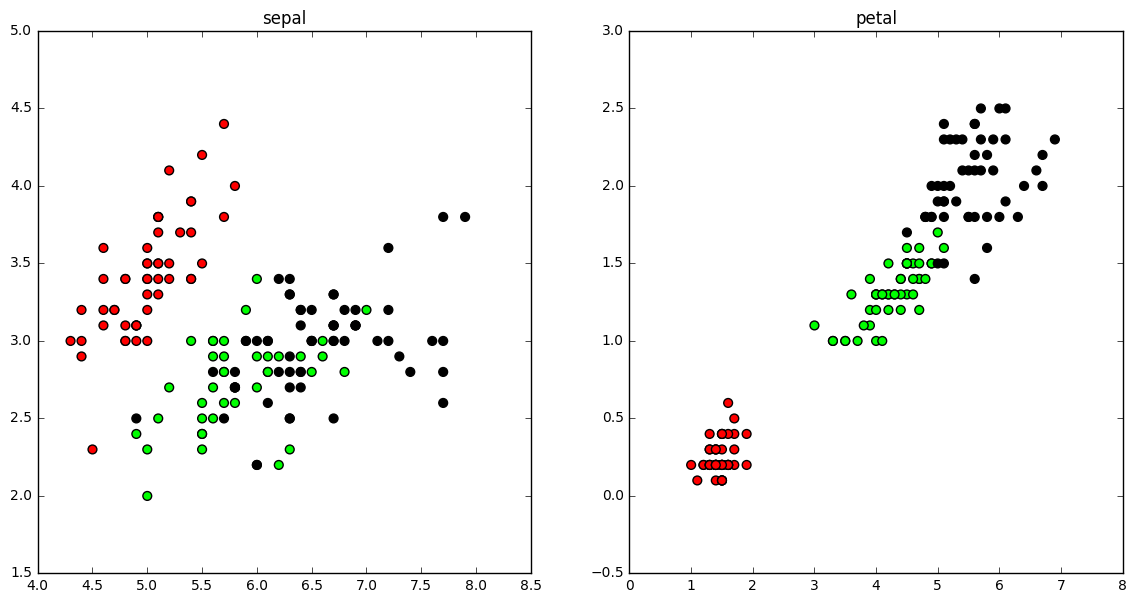

In [10]:
#可视化看一下数据
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 2, 1)
plt.scatter(x.sepal_length, x.sepal_width, c=colormap[y.Targets], s=40)
plt.title('sepal')

plt.subplot(1, 2, 2)
plt.scatter(x.petal_length, x.petal_width, c=colormap[y.Targets], s=40)
plt.title('petal')

In [12]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

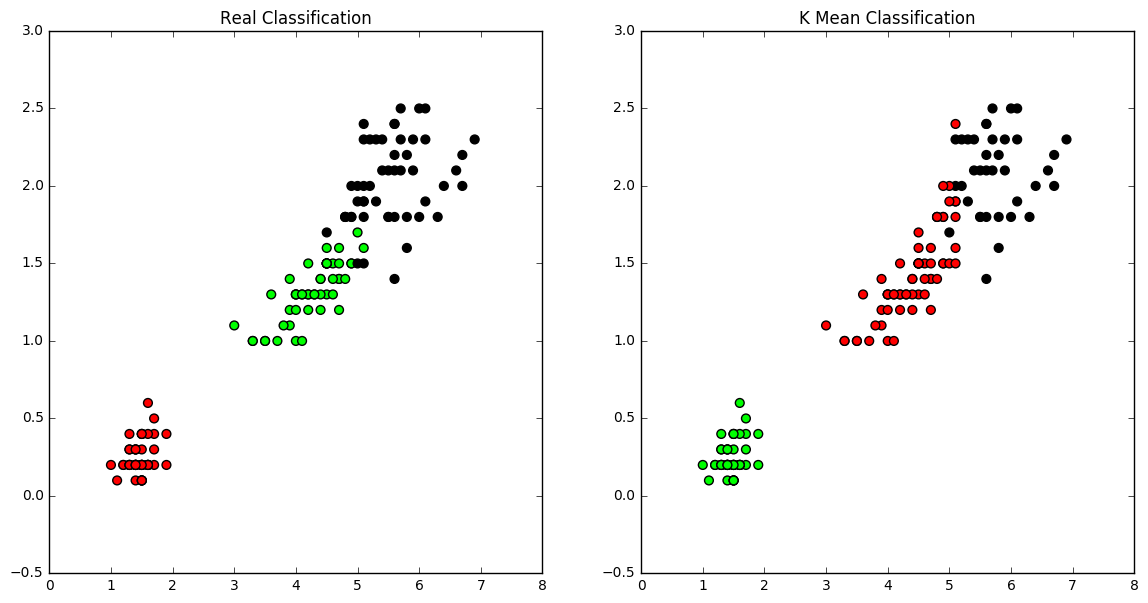

In [13]:
plt.figure(figsize=(14, 7))

colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 2, 1)
plt.scatter(x.petal_length, x.petal_width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.subplot(1, 2, 2)
plt.scatter(x.petal_length, x.petal_width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [14]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
np.array(y.Targets)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
#为了类别颜色一致
predY = np.choose(model.labels_,[1,0,2]).astype(np.int64)
predY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

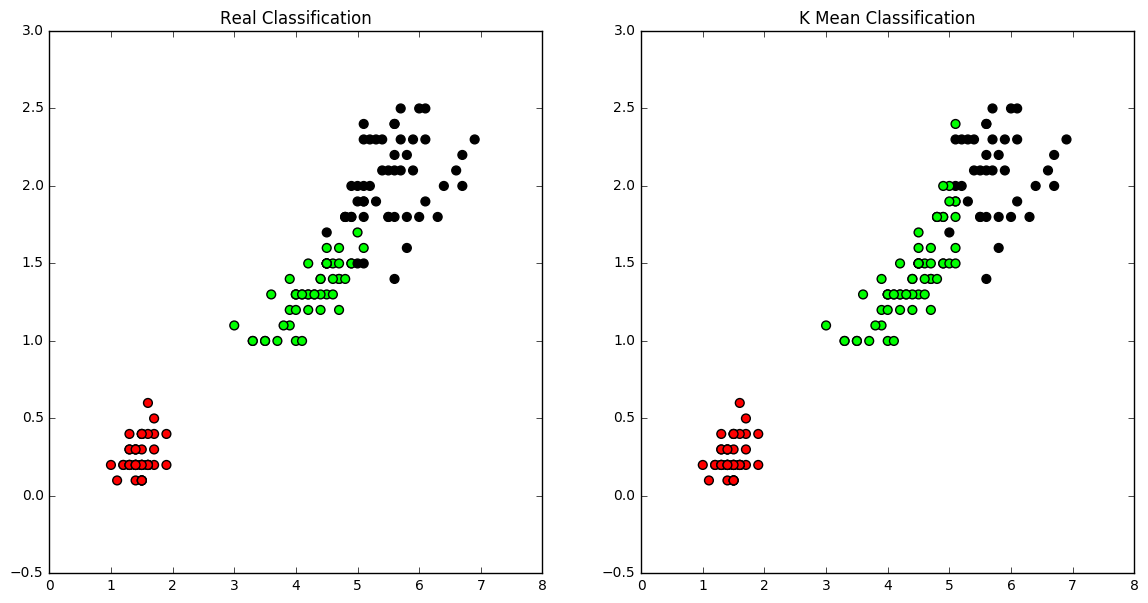

In [25]:
plt.figure(figsize=(14, 7))

colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 2, 1)
plt.scatter(x.petal_length, x.petal_width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.subplot(1, 2, 2)
plt.scatter(x.petal_length, x.petal_width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [26]:
sm.accuracy_score(y, predY)

0.89333333333333331

In [27]:
sm.confusion_matrix(y, predY)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

## 时间序列分析
---
* ARIMA模型
---
时间序列与常规回归问题不同的原因：
1. 时间序列是跟时间有关的，其观察结果往往不是独立的
2. 时间序列具有季节性等模式

---
* 时间序列的稳定性
---

* 非平稳：随机过程随时间变化<br>
    》 若导致非平稳的原因是确定的，可用的方法有：趋势拟合模型、季节调整模型、移动平均、指数平滑等<br>
    》 若导致非平稳的原因是确定的，可用的方法有：ARIMA及自回归条件异方差模型等<br>
* 平稳： 随机过程（时间序列的统计特征如平均数、方差等）不随时间变化

In [31]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col=['Month'], date_parser=dateparse)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
ts = df['#Passengers'] 
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

---
ts['1949-01-01']

ts[datetime(1949,1,1)]

ts['1949-01-01':'1949-05-01']

ts['1949']

---

    代码块
    持续到没有缩进的那一行
    Tab可以不用空一行 换行
    
**分割线**<br>

    三个以上的星号
***
    三个以上的减号
---
    三个以上的底线
___

**列表**

* 星号
- 减号 
+ 加号

**区块引用**

> 引用

> 空行，引用2

----
> 引用
无空行，引用2

***
> 嵌套引用
>> 第二层引用

---
> #### 带标题引用
> 1. 一级引用
>> 1.1 二级引用

利用反斜杠显示字符：

\\  反斜杠

\{\} 花括号



In [33]:
http://pandas.pydata.org/pandas-docs/stable/overview.html

112

## 描述和汇总统计

count	非 NA 值的数量
describe	针对 Series 或 DataFrame 的列计算汇总统计
min , max	最小值和最大值
argmin , argmax	最小值和最大值的索引位置（整数）
idxmin , idxmax	最小值和最大值的索引值
quantile	样本分位数（0 到 1）
sum	求和
mean	均值（一阶距是总体平均数）
median	中位数
**mad	根据均值计算平均绝对离差**
var	方差
std	标准差
skew	样本值的偏度（三阶矩）
kurt	样本值的峰度（四阶矩）
cumsum	样本值的累计和
cummin , cummax	样本值的累计最大值和累计最小值
cumprod	样本值的累计积
diff	计算一阶差分（对时间序列很有用）
pct_change	计算百分数变化

拿样本平均差去估计总体平均差

In [3]:
# 样本值的峰度（四阶矩）
df.kurt()

0   -1.050347
1   -0.871081
2    2.834586
3   -1.041259
dtype: float64

### df.to_excel
    >>> writer = ExcelWriter('output.xlsx')
    >>> df1.to_excel(writer,'Sheet1')
    >>> df2.to_excel(writer,'Sheet2')
    >>> writer.save()

In [5]:
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer)
writer.save()

In [1]:
import pandas as pd

In [6]:
# Convert argument to a numeric type
pd.to_numeric?

In [3]:
pd.to_numeric(['1',2,'3'])

array([1, 2, 3], dtype=int64)

In [4]:
pd.to_numeric(['a','1',2,'3'])# 报错

ValueError: Unable to parse string "a" at position 0

In [7]:
pd.to_numeric(['a','1',2,'3'],errors='ignore') #忽略

array(['a', '1', 2, '3'], dtype=object)

In [8]:
pd.to_numeric(['a','1',2,'3'],errors='coerce') #用nan代替非数值值

array([ nan,   1.,   2.,   3.])

In [10]:
pd.to_numeric(['a','1',2,'3'],downcast='float',errors='coerce')

array([ nan,   1.,   2.,   3.], dtype=float32)

In [ ]:
hhhhh